# 26-Nov-2019

## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("Number of passenngers in data : ",len(titanic))
# Pclass ---> passenger class

Number of passenngers in data :  891


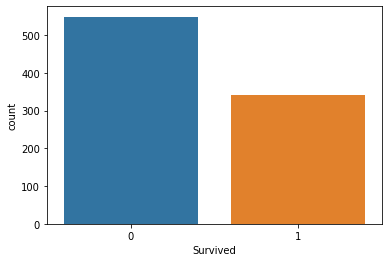

In [3]:
sns.countplot(x='Survived',data=titanic)
plt.show()

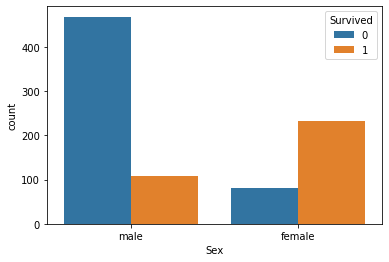

In [4]:
sns.countplot(x='Sex',hue='Survived',data=titanic)
plt.show()

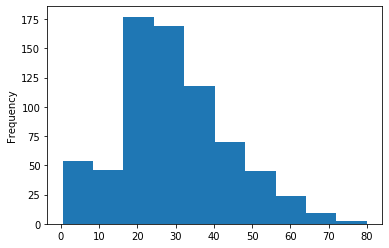

In [5]:
titanic['Age'].plot.hist()

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

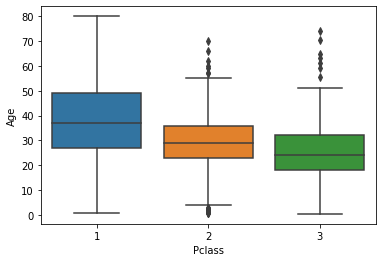

In [7]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [8]:
titanic.drop('Cabin',axis=1,inplace=True)

In [9]:
sex = pd.get_dummies(titanic['Sex'])

In [10]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [11]:
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [12]:
pcl = pd.get_dummies(titanic['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [13]:
titanic = pd.concat([titanic,sex,embark,pcl],axis=1)

In [14]:
titanic.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'],axis=1,inplace = True)

In [15]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [16]:
x = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape)

(712, 9) (179, 9)


In [18]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[94 16]
 [21 48]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions)*100)

79.3296089385475
